In [81]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [82]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [83]:
fish_target = df.loc[cond, ['Species']]
fish_target

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
5,Bream
6,Bream
7,Bream
8,Bream
9,Bream


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

In [115]:
train_input

,Length2,Weight
152,11.8,9.9
151,11.8,10.0
14,32.0,600.0
154,12.2,12.2
5,29.7,450.0
146,10.5,7.5
31,38.5,955.0
18,33.5,610.0
3,29.0,363.0
2,26.5,340.0


In [86]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [87]:
kn.score(test_input, test_target)

1.0

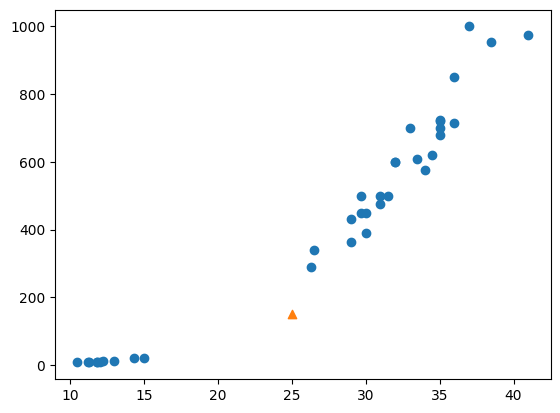

In [88]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])

plt.scatter(25, 150, marker='^')

In [89]:
kn.kneighbors([[25, 150]])

C:\Users\1-20\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[130.48375378, 130.73859415, 138.32150953, 138.39320793,
         140.00603558]]),
 array([[35, 26, 24,  3, 29]]))

In [90]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.063889
Weight     439.769444
dtype: float64
Length2      9.781854
Weight     315.182301
dtype: float64


In [93]:
train_scaled = (train_input - mean) / std #표준편차 구하기

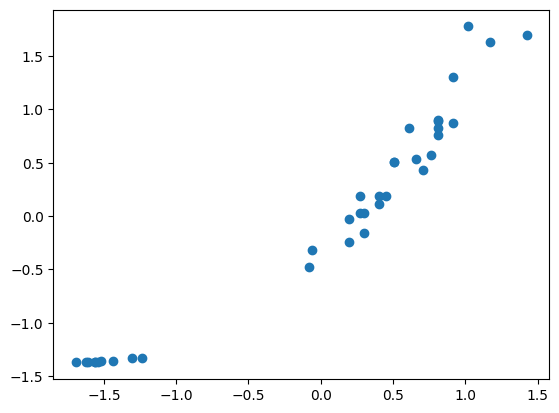

In [113]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight']) #표준편차로 분점도 출력


In [96]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [97]:
test_scaled = (test_input - mean) / std

In [98]:
kn.score(test_scaled, test_target['Species'])

1.0

In [108]:
new = ([25, 150] - mean) / std

In [109]:
new

Length2   -0.210992
Weight    -0.919371
dtype: float64